<a href="https://colab.research.google.com/github/gulabpatel/ChemInformatics/blob/main/Rdkit_Intro_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mr. Gulab Patel IIT BHU, Varanasi, India

<i>[LinkedIn](https://www.linkedin.com/in/gulabpatel1996/)

* SMILES GUI http://www.cheminfo.org/flavor/malari...

* SMARTS https://www.daylight.com/dayhtml/doc/...




## **1. Install conda and libraries**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-12-17 06:12:41--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   164MB/s    in 0.5s    

2020-12-17 06:12:42 (164 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [18]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

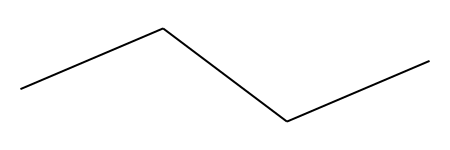

In [3]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [4]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

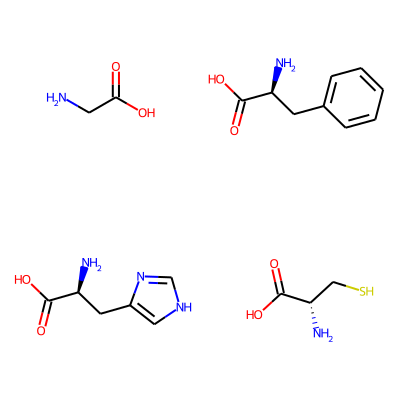

In [8]:
smiles_list = ['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O',
               'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=2)
img

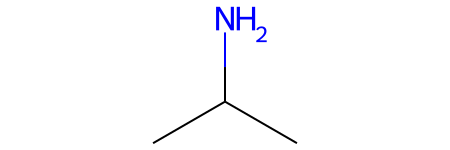

In [13]:
Chem.MolFromSmiles('CC(N)C')

In [12]:
#pattern = Chem.MolFromSmiles('S')
#pattern = Chem.MolFromSmiles('C(=O)O')
pattern = Chem.MolFromSmiles('CCCC')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
True
False


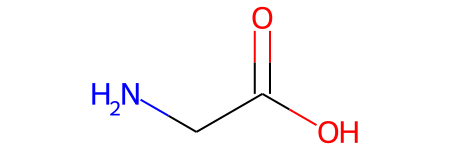

In [15]:
glycine = mol_list[0]
glycine

In [25]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024,bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
print(fp_arr)
print(np.nonzero(fp_arr))

[0. 0. 0. ... 0. 0. 0.]
(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)


In [26]:
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

In [27]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
prints

[(<rdkit.Chem.rdchem.Mol at 0x7f0dc082bbc0>,
  27,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f0dc082bbc0>,
  80,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f0dc082bbc0>,
  147,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f0dc082bbc0>,
  389,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdk

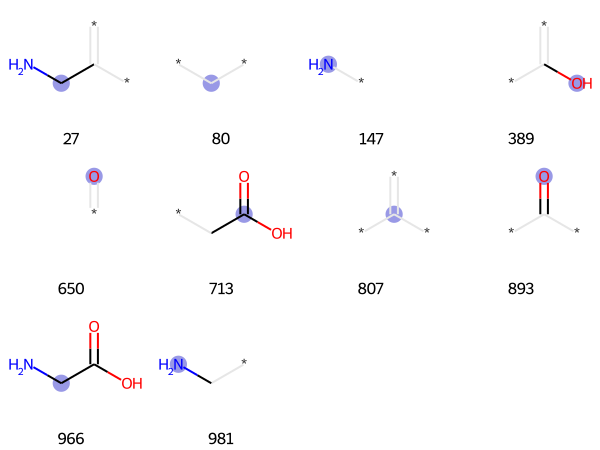

In [28]:
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

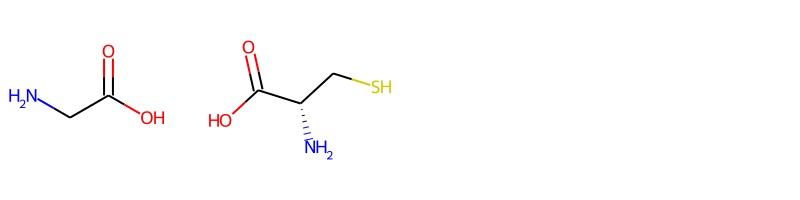

In [32]:
cystein = mol_list[3]
img = Draw.MolsToGridImage([glycine, cystein], molsPerRow=4)
img

In [35]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cystein, 2, nBits=1024,bitInfo=bi)
print('cys: ', list(fp2.GetOnBits()))
print('gly: ', list(fp.GetOnBits()))

cys:  [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly:  [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [36]:
common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
print(common)

{389, 807, 650, 80, 147, 893}


In [37]:
Combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(Combined)

{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}


In [38]:
len(common)/len(Combined)

0.3

In [39]:
DataStructs.TanimotoSimilarity(fp,fp2)

0.3

------------------